# 다항회귀분석

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.model_selection as skmod
import sklearn.preprocessing as skpre
plt.rcParams["font.family"]="BM YEONSUNG"

## Data

In [107]:
D=pd.read_excel("http://data.hossam.kr/E04/cars.xlsx")

In [108]:
data=pd.DataFrame(D)

## 데이터 확인

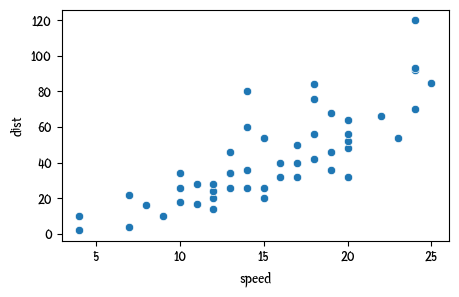

In [109]:
plt.figure(figsize=(5,3))
sb.scatterplot(data,x="speed",y="dist")
plt.show()
# 2차에서 3차식을 예상

<Axes: >

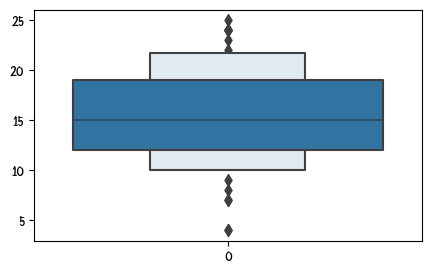

In [110]:
plt.figure(figsize=(5,3))
sb.boxenplot(data["speed"])

### 이상치가 너무 많으므로 robust scale

In [111]:
data["speed"]=skpre.robust_scale(data["speed"])

## 다항식 특성을 고려->데이터 프레임 추가하기
speed의 2차,3차

In [112]:
data["speed^2"]=data["speed"]**2
data["speed^3"]=data["speed"]**3

In [113]:
data.head(3)

,speed,dist,speed^2,speed^3
0,-1.571429,2,2.469388,-3.880466
1,-1.571429,10,2.469388,-3.880466
2,-1.142857,4,1.306122,-1.492711


## 데이터 스플릿

In [114]:
train,test=skmod.train_test_split(data,train_size=0.7,random_state=10)

In [115]:
tr_y=train[["dist"]]
ts_y=test[["dist"]]

In [116]:
import statsmodels.api as sm
import statsmodels.formula.api as sf

### 상수항 추가

In [117]:
tr_x=sm.add_constant(train[train.columns.difference(["dist"])])
ts_x=sm.add_constant(test[test.columns.difference(["dist"])])

## 회귀모델 작성 -> 이상치가 많으므로
Rogust_regression 한번 써보자

In [118]:
model=sm.RLM(exog=tr_x,endog=tr_y)
fit1=model.fit()

### 1차 결과
3차식의 p value가 높은 것을 보아 2차식으로 추정 후 다시 학습 실시

In [119]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   dist   No. Observations:                   35
Model:                            RLM   Df Residuals:                       31
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 25 Aug 2023                                         
Time:                        11:08:27                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7511      2.917     12.254      0.000      30.033      41.469
speed         20.4222      6.794      3.006      0.003       7.106      33.739
speed^2        6.7045      3.346      2.004      0.045       0.146      13.263
speed^3        4.1070      4.016      1.023      0.307      -3.765      11.979
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [120]:
tr_x2,ts_x2=tr_x.drop(columns=['speed^3']),ts_x.drop(columns=['speed^3'])

In [121]:
model=sm.RLM(exog=tr_x2,endog=tr_y)
fit2=model.fit()

### 결과 2 
2차 식에서도 문제가 발생하는 것을 알 수 있음
3차 식으로 다시 변환

In [122]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   dist   No. Observations:                   35
Model:                            RLM   Df Residuals:                       32
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 25 Aug 2023                                         
Time:                        11:08:27                                         
No. Iterations:                    31                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3836      2.999     12.133      0.000      30.506      42.261
speed         26.7649      3.244      8.249      0.000      20.406      33.124
speed^2        5.5257      3.325      1.662      0.097      -0.991      12.042
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [123]:
tr_x3,ts_x3=tr_x.drop(columns=['speed^2']),ts_x.drop(columns=['speed^2'])

In [124]:
model=sm.RLM(exog=tr_x3,endog=tr_y)
fit3=model.fit()

### 결과 3
이번에도 마찬가지

In [125]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   dist   No. Observations:                   35
Model:                            RLM   Df Residuals:                       32
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 25 Aug 2023                                         
Time:                        11:08:27                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0913      2.592     15.466      0.000      35.011      45.172
speed         24.8122      7.352      3.375      0.001      10.403      39.222
speed^3        1.2367      4.319      0.286      0.775      -7.228       9.702
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 결과 4
이게 맞는 듯..

In [126]:
tr_x4,ts_x4=tr_x.drop(columns=['speed^2','speed^3']),ts_x.drop(columns=['speed^2','speed^3'])

In [127]:
model=sm.RLM(exog=tr_x3,endog=tr_y)
fit4=model.fit()

In [128]:
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   dist   No. Observations:                   35
Model:                            RLM   Df Residuals:                       32
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 25 Aug 2023                                         
Time:                        11:08:27                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0913      2.592     15.466      0.000      35.011      45.172
speed         24.8122      7.352      3.375      0.001      10.403      39.222
speed^3        1.2367      4.319      0.286      0.775      -7.228       9.702
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## 시각화로 비교해보기

C:\Users\SAMSUNG\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\SAMSUNG\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


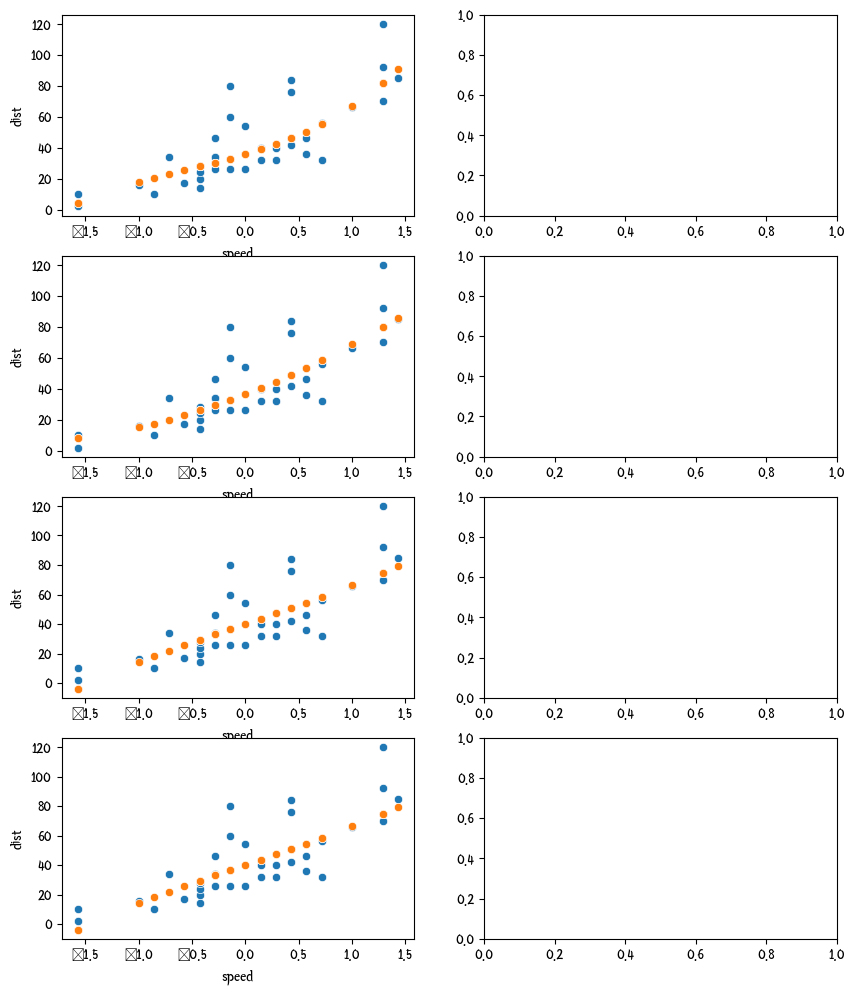

In [134]:
_,a=plt.subplots(4,2,figsize=(10,12))
sub_set=[fit1,fit2,fit3,fit4]
sub_set2=[(tr_x,tr_y),(tr_x2,tr_y),(tr_x3,tr_y),(tr_x4,tr_y)]
for i in range(4):
    sb.scatterplot(x=sub_set2[i][0]["speed"],y=sub_set2[i][1].squeeze(),ax=a[i][0])
    sb.scatterplot(x=sub_set2[i][0]["speed"],y=sub_set[i].fittedvalues,ax=a[i][0])
    